# Assignment 5- Cancer PCA

Student Name: Brendan Lai <br> Student Number: 19241173

## Description 

The Prostate, Lung, Colorectal, and Ovarian (PLCO) Cancer Screening Trial is a large randomized trial designed and sponsored by the National Cancer Institute (NCI) to determine the chance of getting PLCO cancer. The screening component of the trial was completed in 2006. Participants are being followed and additional data will be collected through 2015. In this assignment, you work on a subset of the dataset, for 216 patients, labeled as ('C') cancer and ('N') No cancer, with 4000 features (info related to gene, blood, etc.)

##### Part A
Do a PCA and find the first two Principal Components (PC1 and PC2). Plot PC1-PC2 for these 216 patients.


##### Part B
Check how much information will preserve if we only use the first 10 principal components (in other words, calculate the percentage of information we describe if instead of using all 4000 variables, we use the first 10 PCs).

##### Part C
Build an ANN classifier for this dataset with these new 10 variables (the first 10 PCs), and evaluate your model accuarcy.

## Importing the Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset


In [2]:
dataset = pd.read_csv('Cancer.csv',header=None)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Encoding the Output Data

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## PCA

In [4]:
from sklearn.decomposition import PCA
PrinCom = PCA(n_components=15) # we choose the number of PCs
PrinCom.fit(X)
Z = PrinCom.transform(X)

firstTwoPCs = [Z[:,0],Z[:,1]]

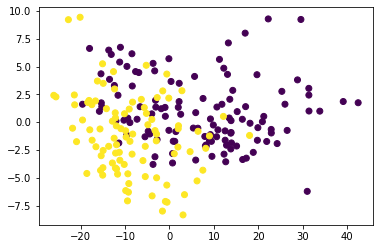

In [6]:
plt.scatter(firstTwoPCs[0], firstTwoPCs[1],c=y) 

### Checking Contibution of 10 PC's

In [8]:
e = []
for z in Z.T:
  e.append(np.var(z))
  
contributions = []
for i in range(Z.shape[1]):
  contributions.append(np.sum(e[:i+1]) / np.sum(e))

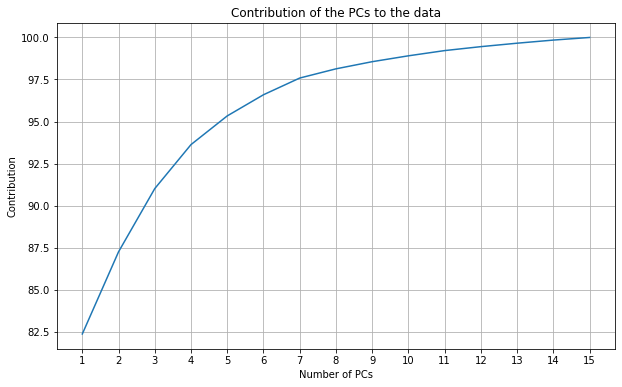

In [9]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1, 16)), [i*100 for i in contributions])
plt.title("Contribution of the PCs to the data")
plt.xlabel("Number of PCs")
plt.ylabel("Contribution")
plt.grid()
plt.xticks(list(range(1,16)))
plt.show()

Calculating all the eigenvalues and vectors then sorting and verifying the first 10 PCs against ALL the eigenvalues

In [10]:
XT = np.transpose(X)
C = np.cov(XT)

e, V = np.linalg.eig(C)

In [11]:
# Sort the eigenvectors and eigenvalues
idx = e.argsort()[::-1]   
e = e[idx]
V = V[:,idx]

In [12]:
numerator = 0
for x in range(0, 10):
    numerator += e[x]
    
first10PCsContribution = (numerator / e.sum() * 100).real

print(f"The first 10 principle components can describe {first10PCsContribution:.2f}% of the information in this dataset.")

The first 10 principle components can describe 97.20% of the information in this dataset.


This means that 97.51 percent information is covered by the 10 largest corresponding eigenvalue/eigenvector combinations. <br>
Comparing this to the discovery when using just the first 15 principle components and looking at the first 10 out of 15 we saw the contribution there was roughly 98.8% so therefore we see that there is a small discrepancy when including all the eigenvalues.

## ANN Classifier

## The Data

In [14]:
ZZ = Z[:,0:10]

### Splitting the Dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ZZ, y, test_size = 0.2, random_state = 0)

### Feature Scaling


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the ANN Model

In [17]:
import tensorflow as tf

In [19]:
# Try one type of model
CancerModel1 = tf.keras.models.Sequential()
CancerModel1.add(tf.keras.layers.Dense(10,activation='relu')) # Add input layer
CancerModel1.add(tf.keras.layers.Dense(20,activation='relu')) # Add hidden layer
CancerModel1.add(tf.keras.layers.Dense(1,activation='sigmoid')) # Add output layer

CancerModel1.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) # Compile model
CancerModel1.fit(X_train, y_train, batch_size = 8, epochs = 100) # Train ANN

Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.7045 - accuracy: 0.6224
Epoch 2/100
22/22 [==============================] - 0s 997us/step - loss: 0.7144 - accuracy: 0.5836
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.5100
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5145
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.5430
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6334 - accuracy: 0.6202
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.6664
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.6410
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.6888
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6784
Epoch 1

In [21]:
# Try another model
CancerModel2 = tf.keras.models.Sequential()
CancerModel2.add(tf.keras.layers.Dense(10,activation='relu')) # Add input layer
CancerModel2.add(tf.keras.layers.Dense(20,activation='relu')) # Add hidden layer
CancerModel2.add(tf.keras.layers.Dense(1,activation='sigmoid')) # Add output layer

CancerModel2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # Compile model
CancerModel2.fit(X_train, y_train, batch_size = 8, epochs = 100) # Train ANN

Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.7250 - accuracy: 0.5468
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6481
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.6830
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7126
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5564 - accuracy: 0.7327
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7771
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7710
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7688
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8020
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8206
Epoch 11/

### Check the accuracy with the test Data

In [22]:
CancerModel1.evaluate(X_test,y_test)
CancerModel2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000


[0.02360031194984913, 1.0]

## Conclusion

Our model's accuracy after performing PCA was quite high. Notably we saw that under the two models we built both were very accurate with the optimizer being SGD in the first we saw an accuracy of 97.7% and then in the second model where the optimzier was adam then we saw an 100% acurracy. This shows our PCA method did well using hte 10 most significant components